In [173]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [174]:
path = 'C:/Users/sungjoo/Desktop/PatientID1868.png'

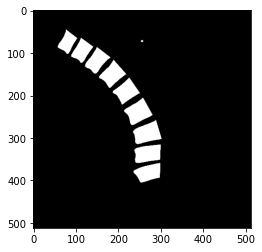

In [175]:
img= cv2.imread(path,0)
plt.imshow(img,cmap='gray')

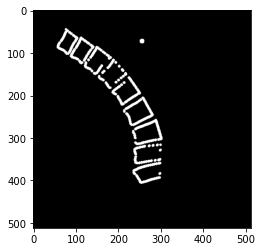

In [177]:
contours =[]
rect=[]
contours,_ = cv2.findContours(img.astype(np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_cntour = np.zeros_like(img, dtype=np.uint8)
# rect = [cv2.boundingRect(cnt) for cnt in contours]
# print(len(contours))
for cnt in contours:
    img_cntour=cv2.drawContours(img_cntour, cnt,-1,255,5)
plt.imshow(img_cntour,cmap='gray')

In [83]:
def rearange_corner_points(corner_points):
    order = np.argsort(corner_points, axis=0)

    lu_candi_idx = np.intersect1d(order[:, 0][:2], order[:, 1][:3])
    rd_candi_idx = np.intersect1d(order[:, 0][2:], order[:, 1][1:])
    ld_candi_idx = np.intersect1d(order[:, 0][:2], order[:, 1][1:])
    ru_candi_idx = np.intersect1d(order[:, 0][2:], order[:, 1][:3])

    lu_candi = np.array([corner_points[idx] for idx in lu_candi_idx])
    lu = lu_candi[lu_candi[:, 1].argsort()][0]

    rd_candi = np.array([corner_points[idx] for idx in rd_candi_idx])
    rd = rd_candi[rd_candi[:, 1].argsort()][-1]

    ld_candi = np.array([corner_points[idx] for idx in ld_candi_idx])
    ld = ld_candi[ld_candi[:, 1].argsort()][-1]

    ru_candi = np.array([corner_points[idx] for idx in ru_candi_idx])
    ru = ru_candi[ru_candi[:, 1].argsort()][0]

    return [lu, ru, ld, rd]


def extract_patch_corner_points(cnts):
    temp = []
    for candi in cnts[:]:
        temp.append(candi)

    cnts = temp
    box_points = []
    for cnt in cnts:
        rc = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rc)
        box_points.append(box)

    return box_points

In [132]:
def average(lst):
    return sum(lst) / len(lst)

def all_points_to_tuple_points(point_list):
    tuple_point_list = []
    for i in range(int(len(point_list) / 2)):
        tuple_point_list.append((point_list[2 * i], point_list[2 * i + 1]))
    return tuple_point_list


In [120]:
avg_contours_area = average([cv2.contourArea(cnt) for cnt in contours])
contours = [cnt for cnt in contours if (cv2.contourArea(cnt) > avg_contours_area / 2.5) and (cv2.contourArea(cnt) < avg_contours_area * 2.5)]
print(type(contours))
pms_patch_extract_corners = extract_patch_corner_points(contours)

<class 'list'>


In [147]:
arranged_corner_points = [rearange_corner_points(ppec) for ppec in pms_patch_extract_corners]
print(len(arranged_corner_points))

8


[array([253.4, 382.2], dtype=float32), array([283.1, 372.3], dtype=float32), array([256.69998, 392.10004], dtype=float32), array([286.4, 382.2], dtype=float32)]
[array([252.41612, 333.6913 ], dtype=float32), array([284.13422, 328.09402], dtype=float32), array([254.40941, 344.9866 ], dtype=float32), array([286.1275, 339.3893], dtype=float32)]
[array([248.50002, 286.50006], dtype=float32), array([280.60004, 275.80005], dtype=float32), array([253.70003, 302.10004], dtype=float32), array([285.80005, 291.40002], dtype=float32)]
[array([230.17197, 236.81526], dtype=float32), array([254.97452, 223.2866 ], dtype=float32), array([239.87897, 254.61143], dtype=float32), array([264.68152, 241.08278], dtype=float32)]
[array([203.78702, 189.7798 ], dtype=float32), array([224.76175, 176.29604], dtype=float32), array([213.04694, 204.18413], dtype=float32), array([234.02167, 190.70036], dtype=float32)]
[array([171.50002, 154.50002], dtype=float32), array([190.00002, 136.00002], dtype=float32), array([1

<ipython-input-181-48051557cb4c>:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img_cntour=cv2.line(img_cntour,tuple(cnt[0]),tuple(cnt[1]),(255,0,0),5)
<ipython-input-181-48051557cb4c>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img_cntour=cv2.line(img_cntour,tuple(cnt[2]),tuple(cnt[3]),(255,0,0),5)


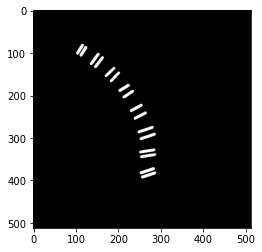

In [181]:
img_cntour = np.zeros_like(img, dtype=np.uint8)

for cnt in arranged_corner_points:
    print(cnt)
    img_cntour=cv2.line(img_cntour,tuple(cnt[0]),tuple(cnt[1]),(255,0,0),5)
    img_cntour=cv2.line(img_cntour,tuple(cnt[2]),tuple(cnt[3]),(255,0,0),5)
    
plt.imshow(img_cntour,cmap='gray')
        
    

In [88]:
print(arranged_corner_points[0][0])

[234.07547 374.26416]


In [62]:
print(rect)

[(236, 359, 63, 47), (238, 316, 62, 44), (235, 258, 67, 57), (214, 206, 67, 64), (187, 158, 64, 64), (155, 117, 64, 66), (122, 87, 61, 63), (253, 70, 6, 6), (89, 65, 53, 60), (58, 45, 46, 58)]


In [66]:
cropped_list=[]
for i in range(len(rect)):
        for j,(x, y, w, h) in enumerate([rect[i]]):
            left, top, right, bottom = x, y, x+w, y+h
            cropped = crop(img,(left, top, right, bottom))
            cropped_list.append(cropped)
print(len(cropped_list))      

10


In [65]:
def crop(image, coords):
    # coords should be a tuple with (x1, y1, x2, y2)
    
    left, top, right, bottom = coords

    if isinstance(image, np.ndarray):
        return image[top: bottom, left: right]
    else:
        return image.crop((left, top, right, bottom))

In [71]:
cropped_min_list=[]
for c in cropped_list:
    if c.shape[0]>10:
        
        print(c.shape)
        cropped_min_list.append(c)
print(len(cropped_min_list))

(47, 63)
(44, 62)
(57, 67)
(64, 67)
(64, 64)
(66, 64)
(63, 61)
(60, 53)
(58, 46)
9


In [49]:
print(c.shape[])

46


In [81]:
corners = cv2.goodFeaturesToTrack(img,40,0.01, 4)
corners =  np.int0(corners)
print(corners)

[[[189 118]]

 [[150  88]]

 [[180 111]]

 [[250 195]]

 [[ 77  46]]

 [[297 360]]

 [[288 258]]

 [[112  65]]

 [[300 301]]

 [[217 150]]

 [[140  86]]

 [[297 393]]

 [[299 316]]

 [[225 159]]

 [[103  66]]

 [[258 206]]

 [[280 246]]

 [[209 221]]

 [[187 193]]

 [[297 350]]

 [[257  74]]

 [[ 90 108]]

 [[ 58  87]]

 [[122 131]]

 [[252 404]]

 [[239 351]]

 [[180 182]]

 [[112 123]]

 [[231 269]]

 [[163 146]]

 [[240 356]]

 [[214 235]]

 [[108 118]]

 [[242 313]]

 [[ 79 102]]

 [[237 291]]

 [[155 156]]

 [[236 378]]

 [[225 227]]

 [[166 125]]]
